## DAB200 -- Graded Lab 3

In this lab, you will gain some experience in dealing with missing data and further practice converting non-numeric features in a dataset to numeric.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-3 | veh14_missing.csv |
| 4-5 | veh15_missing.csv |
| 6-8 | veh16_missing.csv |
| 9-11 | veh17_missing.csv |
| 12-14 | veh18_missing.csv |
| 15-16 | veh19_missing.csv |

**Important Notes:**
- Use [Chapter 7](https://mlbook.explained.ai/bulldozer-intro.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


# Part 0

Please provide the following information:
 - Name (Student ID) : Dharmik Patel Id : 0813537
 - Name (Student ID) : Harshil Patel Id : 0801869
 - Name (Student ID) : Deep Chaudhari Id : 0813502

     

### Part 1 - Create and evaluate an initial model

In this part you should: 
 - use Section 7.3 of the textbook as a guide, except:
     - use all of the data; and
     - use 150 decision trees in your random forest models
 - read in the data
 - isolate all numeric features from original data set
 - fill in any missing values with 0
 - create and evaluate a baseline model 

#### Code (10 marks)

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from rfpimp import * 

In [2]:
data = pd.read_csv("veh18_missing.csv")
data.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,NaN,6,26.2100,6,15.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,XXXXX,N,N
1,6.2,8,21.8108,8,10.0,1,1,Spark Ignition Direct Injection,Naturally Aspirated,XXXXX,,N
2,2.0,4,35.6914,8,10.0,2,2,unknown,Turbocharged,Semi-Automatic,N,Y
3,2.0,4,36.7994,7,10.0,2,2,unknown,Turbocharged,Automated Manual,N,N
4,NaN,8,18.9885,6,15.0,2,2,Multipoint/sequential fuel injection,Naturally Aspirated,XXXXX,N,N


In [3]:
data.columns

Index(['Eng Displ', '# Cyl', 'Comb Unadj FE - Conventional Fuel', '# Gears',
       'Max Ethanol % - Gasoline', 'Intake Valves Per Cyl',
       'Exhaust Valves Per Cyl', 'Fuel Metering Sys Desc',
       'Air Aspiration Method Desc', 'Trans Desc', 'Cyl Deact?',
       'Var Valve Lift?'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          912 non-null    float64
 1   # Cyl                              1290 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1290 non-null   float64
 3   # Gears                            1290 non-null   int64  
 4   Max Ethanol % - Gasoline           1252 non-null   float64
 5   Intake Valves Per Cyl              1290 non-null   int64  
 6   Exhaust Valves Per Cyl             1290 non-null   int64  
 7   Fuel Metering Sys Desc             1290 non-null   object 
 8   Air Aspiration Method Desc         1290 non-null   object 
 9   Trans Desc                         1290 non-null   object 
 10  Cyl Deact?                         1061 non-null   object 
 11  Var Valve Lift?                    1290 non-null   objec

In [5]:
data.isnull().any()

Eng Displ                             True
# Cyl                                False
Comb Unadj FE - Conventional Fuel    False
# Gears                              False
Max Ethanol % - Gasoline              True
Intake Valves Per Cyl                False
Exhaust Valves Per Cyl               False
Fuel Metering Sys Desc               False
Air Aspiration Method Desc           False
Trans Desc                           False
Cyl Deact?                            True
Var Valve Lift?                      False
dtype: bool

In [6]:
number_features = ['Eng Displ','Max Ethanol % - Gasoline','Intake Valves Per Cyl',
                   'Exhaust Valves Per Cyl','# Cyl','# Gears']

In [7]:
X = data[number_features]
y = data['Comb Unadj FE - Conventional Fuel']

In [8]:
X = X.fillna(0)

In [9]:
new = []
for i in range (10):
    rf = RandomForestRegressor(n_estimators=150, oob_score=True) 
    rf.fit(X, y) 
    rf.score(X,y)
    rf.oob_score_
    new.append(rf.oob_score_)
print(f"oob score for randomstate  is {np.mean(rf.oob_score_)}")

oob score for randomstate  is 0.6732688307252459


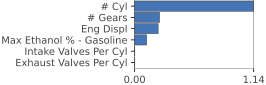

In [10]:
features = list(X.columns)
I = importances(rf, X, y, features=features)
plot_importances(I, color='#4575b4')

### Part 2 - Normalize missing values

In this part you should: 
 - use Section 7.4 of the textbook as a guide
 - convert **all** representations of missing data to a **single** representation
 
#### Code (15 marks)

In [11]:
data.isnull().sum()

Eng Displ                            378
# Cyl                                  0
Comb Unadj FE - Conventional Fuel      0
# Gears                                0
Max Ethanol % - Gasoline              38
Intake Valves Per Cyl                  0
Exhaust Valves Per Cyl                 0
Fuel Metering Sys Desc                 0
Air Aspiration Method Desc             0
Trans Desc                             0
Cyl Deact?                           229
Var Valve Lift?                        0
dtype: int64

In [12]:
data['Cyl Deact?'].unique()

array(['N', '   ', nan, 'Y'], dtype=object)

In [13]:
data['Max Ethanol % - Gasoline'].unique()

array([15., 10., nan, 85.])

In [14]:
data['Eng Displ'].unique()

array([nan, 6.2, 2. , 4.4, 3. , 5.2, 1.6, 2.7, 4. , 3.6, 1.4, 3.5, 5.5,
       1.5, 2.5, 5.3, 1. , 5.7, 2.4, 2.2, 1.8, 6.5, 5. , 3.8, 5.6, 2.8,
       6.4, 2.3, 3.3, 6. , 1.2, 4.3, 2.9, 4.7, 8. , 6.3, 3.9, 3.2, 3.7,
       6.8, 6.6])

In [15]:
data['Fuel Metering Sys Desc'].unique()

array(['Multipoint/sequential fuel injection',
       'Spark Ignition Direct Injection', 'unknown',
       'Common Rail Direct Diesel Injection',
       'Spark Ignition direct & ported injection'], dtype=object)

In [16]:
data['Air Aspiration Method Desc'].unique()

array(['Naturally Aspirated', 'Turbocharged', 'Supercharged',
       'Turbocharged+Supercharged'], dtype=object)

In [17]:
data['Trans Desc'].unique()

array(['XXXXX', 'Semi-Automatic', 'Automated Manual', 'Manual',
       'Automatic',
       'Selectable Continuously Variable (e.g. CVT with paddles)',
       'Automated Manual- Selectable (e.g. Automated Manual with paddles)',
       'Continuously Variable'], dtype=object)

In [18]:
from pandas.api.types import is_string_dtype, is_object_dtype
def normalize_missing_values(data):
        for col in data.columns:
            if is_string_dtype(data[col]) or is_object_dtype(data[col]):
                data[col] = data[col].str.lower()
                data[col] = data[col].fillna(np.nan) 
                data[col] = data[col].replace('nan', np.nan)
                data[col] = data[col].replace('   ', np.nan)
                data[col] = data[col].replace('xxxxx', np.nan)
                data[col] = data[col].replace('unknown', np.nan)
                
        return data

In [19]:
normalize_missing_values(data)

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,NaN,6,26.2100,6,15.0,2,2,multipoint/sequential fuel injection,naturally aspirated,NaN,n,n
1,6.2,8,21.8108,8,10.0,1,1,spark ignition direct injection,naturally aspirated,NaN,NaN,n
2,2.0,4,35.6914,8,10.0,2,2,NaN,turbocharged,semi-automatic,n,y
3,2.0,4,36.7994,7,10.0,2,2,NaN,turbocharged,automated manual,n,n
4,NaN,8,18.9885,6,15.0,2,2,multipoint/sequential fuel injection,naturally aspirated,NaN,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...
1285,NaN,6,31.9191,9,10.0,2,2,spark ignition direct injection,naturally aspirated,NaN,NaN,y
1286,NaN,4,42.9426,6,10.0,2,2,spark ignition direct injection,naturally aspirated,manual,NaN,n
1287,NaN,8,24.8658,7,10.0,2,2,spark ignition direct injection,naturally aspirated,semi-automatic,n,y
1288,2.0,4,33.1287,6,15.0,2,2,spark ignition direct injection,turbocharged,semi-automatic,NaN,n


In [20]:
data['Cyl Deact?'].unique()

array(['n', nan, 'y'], dtype=object)

In [21]:
data.isnull().sum()

Eng Displ                            378
# Cyl                                  0
Comb Unadj FE - Conventional Fuel      0
# Gears                                0
Max Ethanol % - Gasoline              38
Intake Valves Per Cyl                  0
Exhaust Valves Per Cyl                 0
Fuel Metering Sys Desc               375
Air Aspiration Method Desc             0
Trans Desc                           531
Cyl Deact?                           529
Var Valve Lift?                        0
dtype: int64

In [22]:
print(data['Cyl Deact?'].unique())
print(data['Max Ethanol % - Gasoline'].unique())

['n' nan 'y']
[15. 10. nan 85.]


#### Question (5 marks)

Note here all the different ways missing data was represented in the data.  



**Enter your answer here:**
In this data set, there are so many types of data missing which is 'nan', 'blank' , 'xxxxx', 'unknown'. 
i used np.nan method to put nan values in the place of missing data so the it is easyier to put missing values in the next section 


### Part 3 - Categorical features

In this part you should: 
 - use Section 7.5.1 as a guide
 - only use ordinal encoding 
 - convert *all* non-numeric features to numeric 
 - handle any missing values
 
#### Code (25 marks)

In [23]:
data['Cyl Deact?'].unique()

array(['n', nan, 'y'], dtype=object)

In [24]:
sizes = {np.nan:0,'n': 1,'y': 2}

data['Cyl Deact?'] = data['Cyl Deact?'].map(sizes).values
data['Cyl Deact?'].unique()

array([1, 0, 2])

In [25]:
sizes = {np.nan:0,'n': 1,'y': 2}

data['Var Valve Lift?'] = data['Var Valve Lift?'].map(sizes).values
data['Var Valve Lift?'].unique()

array([1, 2])

In [26]:
data['Trans Desc'].unique()

array([nan, 'semi-automatic', 'automated manual', 'manual', 'automatic',
       'selectable continuously variable (e.g. cvt with paddles)',
       'automated manual- selectable (e.g. automated manual with paddles)',
       'continuously variable'], dtype=object)

In [27]:
data['Trans Desc'].unique()
size1 = {np.nan:0, 'semi-automatic':1, 'automated manual':2, 'manual':3, 'automatic':4,
       'selectable continuously variable (e.g. cvt with paddles)':5,
       'automated manual- selectable (e.g. automated manual with paddles)':6,
       'continuously variable':7}
data['Trans Desc'] = data['Trans Desc'].map(size1).values
data['Trans Desc'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [28]:
data['Air Aspiration Method Desc'].unique()
size2={np.nan:0,'naturally aspirated':1, 'turbocharged':2, 'supercharged':3,
       'turbocharged+supercharged':4}
data['Air Aspiration Method Desc'] = data['Air Aspiration Method Desc'].map(size2).values
data['Air Aspiration Method Desc'].unique()

array([1, 2, 3, 4])

In [29]:
data['Fuel Metering Sys Desc'].unique()
size3={np.nan:0,'multipoint/sequential fuel injection':1,
       'spark ignition direct injection':2,
       'common rail direct diesel injection':3,
       'spark ignition direct & ported injection':4}
data['Fuel Metering Sys Desc'] = data['Fuel Metering Sys Desc'].map(size3).values
data['Fuel Metering Sys Desc'].unique()

array([1, 2, 0, 3, 4])

In [30]:
data.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,NaN,6,26.2100,6,15.0,2,2,1,1,0,1,1
1,6.2,8,21.8108,8,10.0,1,1,2,1,0,0,1
2,2.0,4,35.6914,8,10.0,2,2,0,2,1,1,2
3,2.0,4,36.7994,7,10.0,2,2,0,2,2,1,1
4,NaN,8,18.9885,6,15.0,2,2,1,1,0,1,1


### Part 4 - Numeric features

In this part you should: 
 - use Section 7.5.2 as a guide
 - handle any missing values
 
#### Code (30 marks)

In [31]:
data.isnull().sum()

Eng Displ                            378
# Cyl                                  0
Comb Unadj FE - Conventional Fuel      0
# Gears                                0
Max Ethanol % - Gasoline              38
Intake Valves Per Cyl                  0
Exhaust Valves Per Cyl                 0
Fuel Metering Sys Desc                 0
Air Aspiration Method Desc             0
Trans Desc                             0
Cyl Deact?                             0
Var Valve Lift?                        0
dtype: int64

In [32]:
def fill_missing_vals_num():
    median_value = data['Max Ethanol % - Gasoline'].median()
    median_value_01 = data['Eng Displ'].median()
    data['Max Ethanol % - Gasoline'] = data['Max Ethanol % - Gasoline'].fillna(median_value)
    data['Eng Displ'] = data['Eng Displ'].fillna(median_value_01)
    return data
    

In [33]:
data = fill_missing_vals_num()


In [34]:
data.isnull().sum()

Eng Displ                            0
# Cyl                                0
Comb Unadj FE - Conventional Fuel    0
# Gears                              0
Max Ethanol % - Gasoline             0
Intake Valves Per Cyl                0
Exhaust Valves Per Cyl               0
Fuel Metering Sys Desc               0
Air Aspiration Method Desc           0
Trans Desc                           0
Cyl Deact?                           0
Var Valve Lift?                      0
dtype: int64

In [35]:
data.head()

,Eng Displ,# Cyl,Comb Unadj FE - Conventional Fuel,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Fuel Metering Sys Desc,Air Aspiration Method Desc,Trans Desc,Cyl Deact?,Var Valve Lift?
0,3.0,6,26.2100,6,15.0,2,2,1,1,0,1,1
1,6.2,8,21.8108,8,10.0,1,1,2,1,0,0,1
2,2.0,4,35.6914,8,10.0,2,2,0,2,1,1,2
3,2.0,4,36.7994,7,10.0,2,2,0,2,2,1,1
4,3.0,8,18.9885,6,15.0,2,2,1,1,0,1,1


### Part 5 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features after processing them in Parts 2, 3, and 4 above 

#### Code (10 marks)

In [36]:
X_new = data.drop(['Comb Unadj FE - Conventional Fuel'], axis=1) 
y_new = data['Comb Unadj FE - Conventional Fuel']

In [37]:
new = []
for i in range (10):
    rm = RandomForestRegressor(n_estimators=150, oob_score=True) 
    rm.fit(X_new, y_new) 
    rm.score(X_new,y_new)
    rm.oob_score_
    new.append(rm.oob_score_)
print(f"oob score for randomstate  is {np.mean(rm.oob_score_)}")

oob score for randomstate  is 0.7663733661443571


In [38]:
rm.score(X_new,y_new)

0.937082306975425

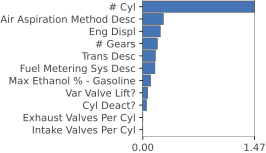

In [39]:
features = list(X_new.columns)
I = importances(rm, X_new, y_new, features=features)
plot_importances(I, color='#4575b4')

#### Questions (5 marks)

Provide answers to the following:
 1. calculate the percent difference between the results of Part 1 and Part 5 (make sure you are using the correct formula for percent difference) 
 2. based on the percent difference, state whether or not the results of Part 5 are an improvement over the results of Part 1

In [40]:
print(f"oob score for randomstate  for baseline model is {np.mean(rf.oob_score_)}")

oob score for randomstate  for baseline model is 0.6732688307252459


In [41]:
print(f"oob score for randomstate for final model  is {np.mean(rm.oob_score_)}")

oob score for randomstate for final model  is 0.7663733661443571


In [42]:
a=np.mean(rf.oob_score_)
b=np.mean(rm.oob_score_)

In [43]:
percentdifference = ((b-a) / ((a + b) / 2))*100
print(percentdifference)

12.934399341942083


**Enter your answers here:**
# ANS_1 : 12.93%
# ANS_2 : percent difference for base line model and final model, our final more 12.93% more accuret and it is improved compare to base line model 